# Features selection

In this script, we remove different groups of features from training to see when the performance decreases

To run this script, the following data files are needed:
- dt_final.xlsx (+)

Saved models:
- xgboost_no_enrichm.model (+)
- xgboost_no_tfidf.model (+)
- xgboost_no_lex.model (+)
- xgboost_no_liwc.model (+)
- xgboost_no_bias_lex.model (+)
- xgboost_no_context.model (+)

(attached: +, not attached: -)

In [69]:
# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
from xgboost import plot_tree
import seaborn as sns

# data
import pandas as pd
import numpy as np
import csv

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
import scikitplot as skplt
import xgboost

In [70]:

data = pd.read_excel('data/dt_final.xlsx',engine='openpyxl')

## 1 Data preparation

In [71]:
dt = data[[
 'label4', 
 'glove_vec300_norm', 
 'tfidf_art', 
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'hedges_context',
 'implicative_verbs_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [72]:
print('Number of missing values:')
mis = (dt.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
dt = dt.dropna(subset=['tfidf_art'])

Number of missing values:
tfidf_art 654


In [73]:
x = dt.drop(['label4'], 1)
y4 = dt[['label4']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\2443302479.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = dt.drop(['label4'], 1)


In [74]:
# train-test split
train_features, test_features, train_labels, test_labels = train_test_split(x, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [75]:
feature_names = list(x.columns)
len(feature_names)

282

In [76]:
# matrix for XGBoost
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [77]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (27801, 282)
Training Labels Shape: (27801, 1)
Testing Features Shape: (3089, 282)
Testing Labels Shape: (3089, 1)
Training Features for final model Shape: (25020, 282)
Training Labels for final model Shape: (25020, 1)
Validation Features Shape: (2781, 282)
Validation Labels Shape: (2781, 1)


## 2 Features selection

### 2.1 Final model (all features)

In [78]:

# xgboost_tuned_weighted.save_model("xgboost_tuned_weighted.model")
xgboost_tuned_weighted = xgboost.Booster()
xgboost_tuned_weighted.load_model("data/xgboost_tuned_weighted.model")

In [79]:
feat_imp = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
feat_imp = feat_imp.reset_index()
feat_imp = feat_imp.rename(columns={"index": "feature", 0: "score"})
feat_imp = feat_imp.sort_values(by=['score'], ascending=False)

feat_imp['name'] = None
for i, feat in enumerate(feature_names):
    #print(i, feat)
    f = 'f'+str(i)
    feat_imp['name'] = feat_imp.apply(lambda row: feat if row['feature']==f else row['name'], axis=1)

feat_imp

,feature,score,name
2,f2,1289.977783,negative_conc
43,f76,421.777802,pos_PROPN
7,f9,119.473946,bias_lexicon
34,f56,116.287125,work
33,f55,112.924179,time
...,...,...,...
82,f167,10.825084,cogproc _context
83,f168,8.725674,insight _context
59,f113,5.623596,dep_pcomp
79,f158,1.342224,negemo _context


### 2.2 Vary importance score [>10 ... >400]

In [80]:
imp_feats = list(feat_imp[feat_imp['score']>400]['name'])
x_imp_feats = x[imp_feats]
list(x_imp_feats)

['negative_conc', 'pos_PROPN']

In [81]:
def f1_eval(predt: np.ndarray, dtrain: xgboost.DMatrix):
    y = dtrain.get_label()
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", metrics.f1_score(y_true=y, y_pred=predt_binary)

In [82]:
column_names = ["imp_thr", "auc", "f1", "precision", "recall"]
imp_perf = pd.DataFrame(columns = column_names)
imp_perf_l = []

In [83]:
thr = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400]
for th in thr:
    imp_feats = list(feat_imp[feat_imp['score']>=th]['name'])
    x_imp_feats = x[imp_feats]
    
    train_features, test_features, train_labels, test_labels = train_test_split(x_imp_feats, y4, 
                                                                            test_size = 0.10, random_state = 42)
    train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                                test_size = 0.10, random_state = 42)
    
    feature_names = list(train_features)
    
    dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
    dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
    dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
    dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)
    
    params = {'max_depth': 6,
     'min_child_weight': 18,
     'eta': 0.2,
     'subsample': 1.0,
     'colsample_bytree': 1.0,
     'objective': 'binary:logistic',
     'disable_default_eval_metric': 1,
     'seed': 42,
     'tree_method': 'hist',
     'scale_pos_weight': 9.471599402092675}
    num_boost_round=999

    xgboost_imp = xgboost.train(
        params,
        dtrain1,
        num_boost_round=num_boost_round,
        evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)

    xgboost_imp_predt = np.where(xgboost_imp.predict(dtest) > 0.5, 1, 0)
    auc = round(metrics.roc_auc_score(dtest.get_label(), xgboost_imp_predt),2)
    f1 = round(metrics.f1_score(dtest.get_label(),xgboost_imp_predt),2)
    pr = round(metrics.precision_score(dtest.get_label(), xgboost_imp_predt),2)
    rc = round(metrics.recall_score(dtest.get_label(), xgboost_imp_predt),2)
    
    values = [th, auc, f1, pr, rc]
    zipped = zip(column_names, values)
    a_dictionary = dict(zipped)
    imp_perf_l.append(a_dictionary) 

imp_perf = imp_perf.append(imp_perf_l, True)
imp_perf

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.33252	dval-F1_score:0.31045
[2]	dtrain-F1_score:0.45278	dval-F1_score:0.41905


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[3]	dtrain-F1_score:0.45651	dval-F1_score:0.41697
[4]	dtrain-F1_score:0.46151	dval-F1_score:0.42435
[5]	dtrain-F1_score:0.46049	dval-F1_score:0.41197
[6]	dtrain-F1_score:0.46113	dval-F1_score:0.42031
[7]	dtrain-F1_score:0.46316	dval-F1_score:0.41901
[8]	dtrain-F1_score:0.46242	dval-F1_score:0.41667
[9]	dtrain-F1_score:0.46375	dval-F1_score:0.41581
[10]	dtrain-F1_score:0.46871	dval-F1_score:0.41667
[11]	dtrain-F1_score:0.47027	dval-F1_score:0.42384
[12]	dtrain-F1_score:0.47004	dval-F1_score:0.42645
[13]	dtrain-F1_score:0.47120	dval-F1_score:0.43660
[14]	dtrain-F1_score:0.47566	dval-F1_score:0.43408
[15]	dtrain-F1_score:0.47365	dval-F1_score:0.43200
[16]	dtrain-F1_score:0.48077	dval-F1_score:0.43465
[17]	dtrain-F1_score:0.48260	dval-F1_score:0.43987
[18]	dtrain-F1_score:0.48338	dval-F1_score:0.44057
[19]	dtrain-F1_score:0.48074	dval-F1_score:0.43082
[20]	dtrain-F1_score:0.48191	dval-F1_score:0.42679
[21]	dtrain-F1_score:0.48282	dval-F1_score:0.42500
[22]	dtrain-F1_score:0.48562	dval-F1_s

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[3]	dtrain-F1_score:0.45679	dval-F1_score:0.42086
[4]	dtrain-F1_score:0.46017	dval-F1_score:0.42066
[5]	dtrain-F1_score:0.46160	dval-F1_score:0.41429
[6]	dtrain-F1_score:0.46105	dval-F1_score:0.41623
[7]	dtrain-F1_score:0.46316	dval-F1_score:0.41489
[8]	dtrain-F1_score:0.46505	dval-F1_score:0.41770
[9]	dtrain-F1_score:0.46564	dval-F1_score:0.41828
[10]	dtrain-F1_score:0.46559	dval-F1_score:0.41638
[11]	dtrain-F1_score:0.46958	dval-F1_score:0.42445
[12]	dtrain-F1_score:0.47123	dval-F1_score:0.41979
[13]	dtrain-F1_score:0.47629	dval-F1_score:0.43862
[14]	dtrain-F1_score:0.47585	dval-F1_score:0.43393
[15]	dtrain-F1_score:0.47825	dval-F1_score:0.42834
[16]	dtrain-F1_score:0.48237	dval-F1_score:0.42649
[17]	dtrain-F1_score:0.48164	dval-F1_score:0.42973
[18]	dtrain-F1_score:0.48629	dval-F1_score:0.42607
[19]	dtrain-F1_score:0.48891	dval-F1_score:0.42743
[20]	dtrain-F1_score:0.49020	dval-F1_score:0.42880
[21]	dtrain-F1_score:0.49039	dval-F1_score:0.42857
[22]	dtrain-F1_score:0.49017	dval-F1_s

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[4]	dtrain-F1_score:0.44516	dval-F1_score:0.41035
[5]	dtrain-F1_score:0.45022	dval-F1_score:0.40773
[6]	dtrain-F1_score:0.45061	dval-F1_score:0.41035
[7]	dtrain-F1_score:0.45928	dval-F1_score:0.40893
[8]	dtrain-F1_score:0.45660	dval-F1_score:0.40672
[9]	dtrain-F1_score:0.45643	dval-F1_score:0.41322
[10]	dtrain-F1_score:0.46101	dval-F1_score:0.40932
[11]	dtrain-F1_score:0.46311	dval-F1_score:0.41528
[12]	dtrain-F1_score:0.46572	dval-F1_score:0.41930
[13]	dtrain-F1_score:0.46608	dval-F1_score:0.41667
[14]	dtrain-F1_score:0.46670	dval-F1_score:0.41861
[15]	dtrain-F1_score:0.46900	dval-F1_score:0.41270
[16]	dtrain-F1_score:0.47134	dval-F1_score:0.41204
[17]	dtrain-F1_score:0.47117	dval-F1_score:0.41456
[18]	dtrain-F1_score:0.47095	dval-F1_score:0.41009
[19]	dtrain-F1_score:0.47154	dval-F1_score:0.40498
[20]	dtrain-F1_score:0.47241	dval-F1_score:0.40248
[21]	dtrain-F1_score:0.47469	dval-F1_score:0.39939
[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.34262	dval-F1_sc

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[4]	dtrain-F1_score:0.44332	dval-F1_score:0.40462
[5]	dtrain-F1_score:0.43658	dval-F1_score:0.40203
[6]	dtrain-F1_score:0.43855	dval-F1_score:0.40472
[7]	dtrain-F1_score:0.43691	dval-F1_score:0.40134
[8]	dtrain-F1_score:0.43826	dval-F1_score:0.40336
[9]	dtrain-F1_score:0.44218	dval-F1_score:0.40932
[10]	dtrain-F1_score:0.44632	dval-F1_score:0.41077
[11]	dtrain-F1_score:0.44757	dval-F1_score:0.40864
[12]	dtrain-F1_score:0.44905	dval-F1_score:0.40735
[13]	dtrain-F1_score:0.44981	dval-F1_score:0.40667
[14]	dtrain-F1_score:0.45078	dval-F1_score:0.40397
[15]	dtrain-F1_score:0.45111	dval-F1_score:0.40260
[16]	dtrain-F1_score:0.45238	dval-F1_score:0.40325
[17]	dtrain-F1_score:0.45304	dval-F1_score:0.40194
[18]	dtrain-F1_score:0.45492	dval-F1_score:0.41882
[19]	dtrain-F1_score:0.45519	dval-F1_score:0.41868
[20]	dtrain-F1_score:0.45512	dval-F1_score:0.41868
[21]	dtrain-F1_score:0.45635	dval-F1_score:0.41452
[22]	dtrain-F1_score:0.45662	dval-F1_score:0.40413
[23]	dtrain-F1_score:0.45636	dval-F1_

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[5]	dtrain-F1_score:0.43334	dval-F1_score:0.40269
[6]	dtrain-F1_score:0.43669	dval-F1_score:0.40468
[7]	dtrain-F1_score:0.43578	dval-F1_score:0.40066
[8]	dtrain-F1_score:0.43718	dval-F1_score:0.39935
[9]	dtrain-F1_score:0.43811	dval-F1_score:0.40584
[10]	dtrain-F1_score:0.43950	dval-F1_score:0.40262
[11]	dtrain-F1_score:0.44138	dval-F1_score:0.40198
[12]	dtrain-F1_score:0.44448	dval-F1_score:0.40661
[13]	dtrain-F1_score:0.44639	dval-F1_score:0.40460
[14]	dtrain-F1_score:0.44619	dval-F1_score:0.40460
[15]	dtrain-F1_score:0.44860	dval-F1_score:0.40000
[16]	dtrain-F1_score:0.44905	dval-F1_score:0.40065
[17]	dtrain-F1_score:0.45011	dval-F1_score:0.41475
[18]	dtrain-F1_score:0.45002	dval-F1_score:0.40986
[19]	dtrain-F1_score:0.45121	dval-F1_score:0.41284
[20]	dtrain-F1_score:0.45109	dval-F1_score:0.41705
[21]	dtrain-F1_score:0.44935	dval-F1_score:0.40235
[22]	dtrain-F1_score:0.45073	dval-F1_score:0.39882
[23]	dtrain-F1_score:0.45071	dval-F1_score:0.40588
[24]	dtrain-F1_score:0.45083	dval-F1

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[5]	dtrain-F1_score:0.44143	dval-F1_score:0.40530
[6]	dtrain-F1_score:0.44498	dval-F1_score:0.40684
[7]	dtrain-F1_score:0.43239	dval-F1_score:0.40328
[8]	dtrain-F1_score:0.43043	dval-F1_score:0.40388
[9]	dtrain-F1_score:0.43553	dval-F1_score:0.40000
[10]	dtrain-F1_score:0.43668	dval-F1_score:0.40260
[11]	dtrain-F1_score:0.44721	dval-F1_score:0.40773
[12]	dtrain-F1_score:0.44725	dval-F1_score:0.40773
[13]	dtrain-F1_score:0.44799	dval-F1_score:0.40845
[14]	dtrain-F1_score:0.44003	dval-F1_score:0.40065
[15]	dtrain-F1_score:0.44022	dval-F1_score:0.40323
[16]	dtrain-F1_score:0.44857	dval-F1_score:0.40747
[17]	dtrain-F1_score:0.44936	dval-F1_score:0.40747
[18]	dtrain-F1_score:0.44715	dval-F1_score:0.41091
[19]	dtrain-F1_score:0.44036	dval-F1_score:0.40774
[20]	dtrain-F1_score:0.43953	dval-F1_score:0.40835
[21]	dtrain-F1_score:0.44546	dval-F1_score:0.41534
[22]	dtrain-F1_score:0.44551	dval-F1_score:0.41346
[23]	dtrain-F1_score:0.44551	dval-F1_score:0.41346
[24]	dtrain-F1_score:0.43902	dval-F1

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[5]	dtrain-F1_score:0.43337	dval-F1_score:0.39854
[6]	dtrain-F1_score:0.43337	dval-F1_score:0.39854
[7]	dtrain-F1_score:0.43439	dval-F1_score:0.39854
[8]	dtrain-F1_score:0.43382	dval-F1_score:0.39564
[9]	dtrain-F1_score:0.43375	dval-F1_score:0.39564
[10]	dtrain-F1_score:0.43405	dval-F1_score:0.39564
[11]	dtrain-F1_score:0.43400	dval-F1_score:0.39787
[12]	dtrain-F1_score:0.43571	dval-F1_score:0.40000
[13]	dtrain-F1_score:0.43512	dval-F1_score:0.40000
[14]	dtrain-F1_score:0.43496	dval-F1_score:0.40000
[15]	dtrain-F1_score:0.43504	dval-F1_score:0.40000
[16]	dtrain-F1_score:0.43537	dval-F1_score:0.40285
[17]	dtrain-F1_score:0.43145	dval-F1_score:0.40550
[18]	dtrain-F1_score:0.43194	dval-F1_score:0.40069
[19]	dtrain-F1_score:0.42705	dval-F1_score:0.40960
[20]	dtrain-F1_score:0.42617	dval-F1_score:0.40506
[21]	dtrain-F1_score:0.42298	dval-F1_score:0.40183
[22]	dtrain-F1_score:0.42331	dval-F1_score:0.40183
[23]	dtrain-F1_score:0.42351	dval-F1_score:0.40183
[24]	dtrain-F1_score:0.42292	dval-F1

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[5]	dtrain-F1_score:0.40369	dval-F1_score:0.37658
[6]	dtrain-F1_score:0.40296	dval-F1_score:0.37872
[7]	dtrain-F1_score:0.40296	dval-F1_score:0.37872
[8]	dtrain-F1_score:0.40296	dval-F1_score:0.37872
[9]	dtrain-F1_score:0.40296	dval-F1_score:0.37872
[10]	dtrain-F1_score:0.40248	dval-F1_score:0.38305
[11]	dtrain-F1_score:0.39234	dval-F1_score:0.36488
[12]	dtrain-F1_score:0.39234	dval-F1_score:0.36488
[13]	dtrain-F1_score:0.39412	dval-F1_score:0.36639
[14]	dtrain-F1_score:0.39412	dval-F1_score:0.36639
[15]	dtrain-F1_score:0.39418	dval-F1_score:0.36639
[16]	dtrain-F1_score:0.39421	dval-F1_score:0.37037
[17]	dtrain-F1_score:0.39421	dval-F1_score:0.37037
[18]	dtrain-F1_score:0.39439	dval-F1_score:0.37037
[19]	dtrain-F1_score:0.39439	dval-F1_score:0.37037
[20]	dtrain-F1_score:0.39533	dval-F1_score:0.37088
[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.36512	dval-F1_score:0.38139
[2]	dtrain-F1_score:0.36841	dval-F1_score:0.38051
[3]	dtrain-F1_score:0.39937	dval-F1_sco

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[6]	dtrain-F1_score:0.39902	dval-F1_score:0.37959
[7]	dtrain-F1_score:0.39902	dval-F1_score:0.37959
[8]	dtrain-F1_score:0.39047	dval-F1_score:0.35961
[9]	dtrain-F1_score:0.39047	dval-F1_score:0.35961
[10]	dtrain-F1_score:0.39067	dval-F1_score:0.36161
[11]	dtrain-F1_score:0.39067	dval-F1_score:0.36161
[12]	dtrain-F1_score:0.39004	dval-F1_score:0.36338
[13]	dtrain-F1_score:0.39183	dval-F1_score:0.36490
[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.36646	dval-F1_score:0.38139
[2]	dtrain-F1_score:0.36841	dval-F1_score:0.38051
[3]	dtrain-F1_score:0.39895	dval-F1_score:0.37959
[4]	dtrain-F1_score:0.39895	dval-F1_score:0.37959
[5]	dtrain-F1_score:0.39895	dval-F1_score:0.37959


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[6]	dtrain-F1_score:0.39895	dval-F1_score:0.37959
[7]	dtrain-F1_score:0.39895	dval-F1_score:0.37959
[8]	dtrain-F1_score:0.39895	dval-F1_score:0.37959
[9]	dtrain-F1_score:0.39895	dval-F1_score:0.37959
[10]	dtrain-F1_score:0.39895	dval-F1_score:0.37959
[11]	dtrain-F1_score:0.38638	dval-F1_score:0.35033
[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[2]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[3]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[4]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[5]	dtrain-F1_score:0.38912	dval-F1_score:0.36215


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[6]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[7]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[8]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[9]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[10]	dtrain-F1_score:0.38912	dval-F1_score:0.36215
[11]	dtrain-F1_score:0.38912	dval-F1_score:0.36215


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\538103137.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imp_perf = imp_perf.append(imp_perf_l, True)


,imp_thr,auc,f1,precision,recall
0,10,0.78,0.42,0.29,0.76
1,20,0.79,0.43,0.30,0.79
2,30,0.77,0.40,0.28,0.75
3,40,0.76,0.39,0.27,0.73
4,50,0.76,0.39,0.26,0.74
5,60,0.75,0.38,0.26,0.72
6,70,0.73,0.36,0.24,0.72
7,80,0.73,0.37,0.25,0.67
8,90,0.72,0.37,0.26,0.65
9,100,0.71,0.39,0.29,0.59


### 2.3 All features without enrichment features

In [84]:
x_no_enrichm = x.drop(['pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',                
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context'], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\1049210408.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_no_enrichm = x.drop(['pos_ADJ',


In [85]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_enrichm, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [86]:
feature_names = list(x_no_enrichm.columns)
len(feature_names)

134

In [87]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [88]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [89]:
xgboost_no_enrichm = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.36653	dval-F1_score:0.38172


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[2]	dtrain-F1_score:0.43389	dval-F1_score:0.40234
[3]	dtrain-F1_score:0.44814	dval-F1_score:0.40631
[4]	dtrain-F1_score:0.44571	dval-F1_score:0.40550
[5]	dtrain-F1_score:0.44288	dval-F1_score:0.40878
[6]	dtrain-F1_score:0.44721	dval-F1_score:0.40545
[7]	dtrain-F1_score:0.44717	dval-F1_score:0.40609
[8]	dtrain-F1_score:0.45106	dval-F1_score:0.40924
[9]	dtrain-F1_score:0.45366	dval-F1_score:0.40790
[10]	dtrain-F1_score:0.45301	dval-F1_score:0.40777
[11]	dtrain-F1_score:0.45454	dval-F1_score:0.40519
[12]	dtrain-F1_score:0.45704	dval-F1_score:0.40258
[13]	dtrain-F1_score:0.46100	dval-F1_score:0.40711
[14]	dtrain-F1_score:0.46052	dval-F1_score:0.40580
[15]	dtrain-F1_score:0.46141	dval-F1_score:0.40711
[16]	dtrain-F1_score:0.46263	dval-F1_score:0.40902
[17]	dtrain-F1_score:0.46383	dval-F1_score:0.41034
[18]	dtrain-F1_score:0.46547	dval-F1_score:0.41158
[19]	dtrain-F1_score:0.46621	dval-F1_score:0.40902
[20]	dtrain-F1_score:0.46825	dval-F1_score:0.40960
[21]	dtrain-F1_score:0.46814	dval-F1_sc

In [90]:

# xgboost_no_enrichm.save_model("xgboost_no_enrichm.model")
xgboost_no_enrichm = xgboost.Booster()
xgboost_no_enrichm.load_model("data/xgboost_no_enrichm.model")

In [91]:
xgboost_no_enrichm_predt = np.where(xgboost_no_enrichm.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_enrichm, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_enrichm_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_enrichm_predt).transpose())

Performance of xgboost_no_enrichm, test:
F1: 0.45
Precision: 0.32
Recall: 0.76
AUC: 0.79
Accuracy: 0.82
Confusion matrix:
 [[2291   74]
 [ 493  231]]


Text(0, 0.5, 'Features')

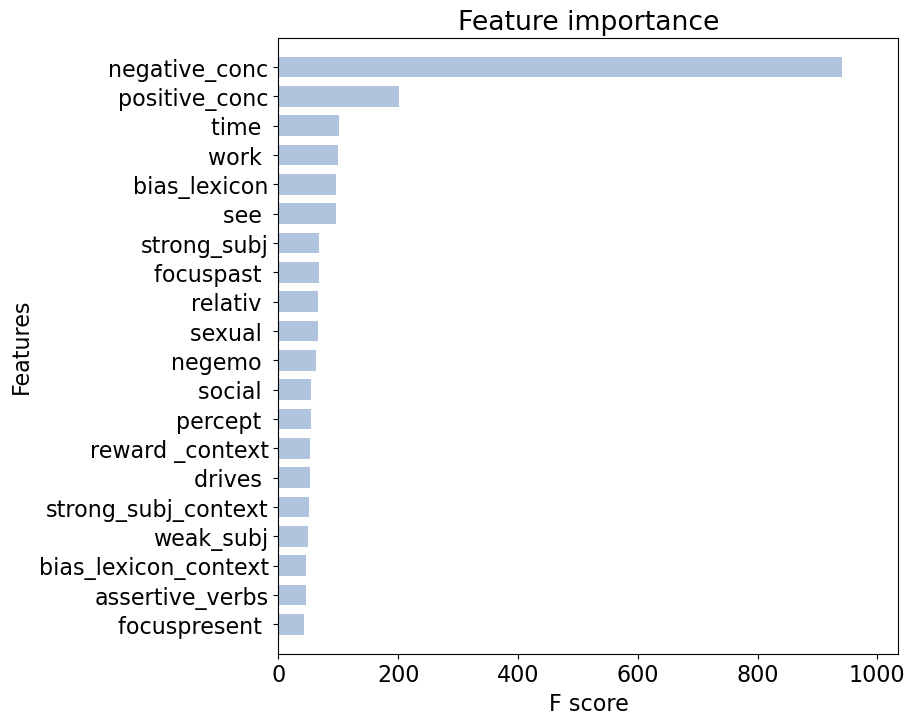

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_enrichm, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.4 All features without TF-IDF

In [93]:
x_no_tfidf = x.drop(['tfidf_art'], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\3945757450.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_no_tfidf = x.drop(['tfidf_art'], 1)


In [94]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_tfidf, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [95]:
feature_names = list(x_no_tfidf.columns)
len(feature_names)

281

In [96]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [97]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [98]:
xgboost_no_tfidf = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[1]	dtrain-F1_score:0.33202	dval-F1_score:0.30539
[2]	dtrain-F1_score:0.42907	dval-F1_score:0.40355
[3]	dtrain-F1_score:0.45272	dval-F1_score:0.41091
[4]	dtrain-F1_score:0.45584	dval-F1_score:0.40215
[5]	dtrain-F1_score:0.45764	dval-F1_score:0.41770
[6]	dtrain-F1_score:0.45552	dval-F1_score:0.41319
[7]	dtrain-F1_score:0.45819	dval-F1_score:0.41463
[8]	dtrain-F1_score:0.45946	dval-F1_score:0.41509
[9]	dtrain-F1_score:0.46095	dval-F1_score:0.41736
[10]	dtrain-F1_score:0.46212	dval-F1_score:0.42333
[11]	dtrain-F1_score:0.46362	dval-F1_score:0.42333
[12]	dtrain-F1_score:0.46544	dval-F1_score:0.42333
[13]	dtrain-F1_score:0.46805	dval-F1_score:0.41653
[14]	dtrain-F1_score:0.47038	dval-F1_score:0.41459
[15]	dtrain-F1_score:0.46942	dval-F1_score:0.41883
[16]	dtrain-F1_score:0.47128	dval-F1_score:0.41587
[17]	dtrain-F1_score:0.47479	dval-F1_score:0.41325
[18]	dtrain-F1_score:0.47658	dval-F1_score:0.41575
[19]	dtrain-F1_score:0.47782	dval-F1_score:0.41824
[20]	dtrain-F1_score:0.47999	dval-F1_sco

In [99]:

# xgboost_no_tfidf.save_model("xgboost_no_tfidf.model")
xgboost_no_tfidf = xgboost.Booster()
xgboost_no_tfidf.load_model("data/xgboost_no_tfidf.model")

In [100]:
xgboost_no_tfidf_predt = np.where(xgboost_no_tfidf.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_tfidf, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_tfidf_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_tfidf_predt).transpose())

Performance of xgboost_no_tfidf, test:
F1: 0.43
Precision: 0.3
Recall: 0.8
AUC: 0.8
Accuracy: 0.79
Confusion matrix:
 [[2208   61]
 [ 576  244]]


Text(0, 0.5, 'Features')

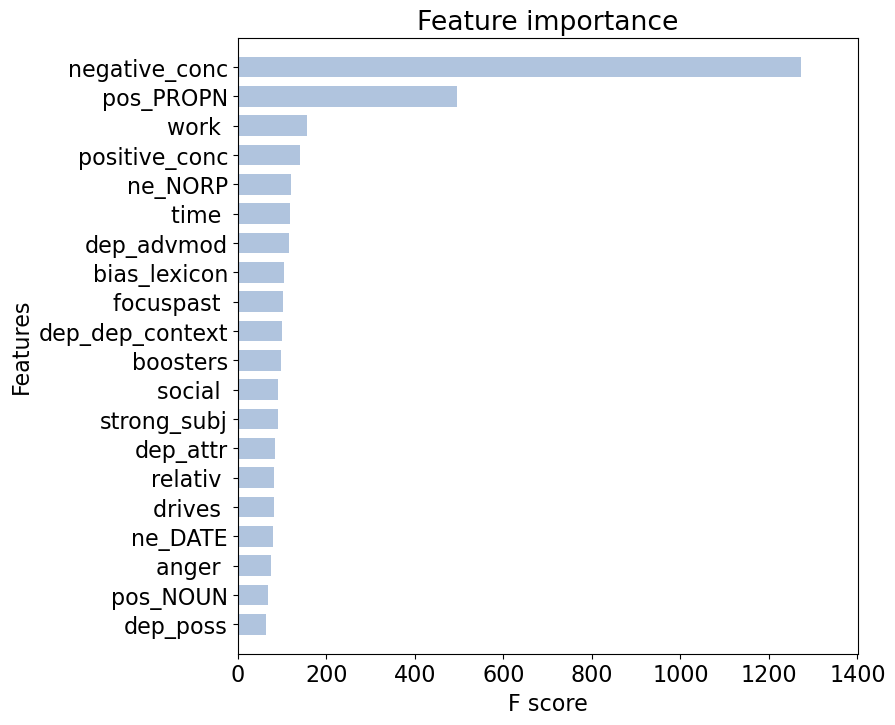

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_tfidf, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.5 All features without LIWC2015

In [102]:
x_no_liwc = x.drop(['affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context'], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\1877739225.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_no_liwc = x.drop(['affect ',


In [103]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_liwc, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [104]:
feature_names = list(x_no_liwc.columns)
len(feature_names)

178

In [105]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [106]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [107]:
xgboost_no_liwc = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.32993	dval-F1_score:0.30267
[2]	dtrain-F1_score:0.45314	dval-F1_score:0.42205
[3]	dtrain-F1_score:0.45615	dval-F1_score:0.41544
[4]	dtrain-F1_score:0.46177	dval-F1_score:0.41727
[5]	dtrain-F1_score:0.45932	dval-F1_score:0.41187
[6]	dtrain-F1_score:0.46222	dval-F1_score:0.41438
[7]	dtrain-F1_score:0.46253	dval-F1_score:0.41096
[8]	dtrain-F1_score:0.46190	dval-F1_score:0.41286
[9]	dtrain-F1_score:0.46082	dval-F1_score:0.41118
[10]	dtrain-F1_score:0.46393	dval-F1_score:0.41967
[11]	dtrain-F1_score:0.46525	dval-F1_score:0.41424


In [108]:

xgboost_no_liwc.save_model("data/xgboost_no_liwc.model")
# xgboost_no_liwc = xgboost.Booster()
# xgboost_no_liwc.load_model("xgboost_no_liwc.model")

In [109]:
xgboost_no_liwc_predt = np.where(xgboost_no_liwc.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_liwc, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_liwc_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_liwc_predt).transpose())

Performance of xgboost_no_liwc, test:
F1: 0.41
Precision: 0.29
Recall: 0.69
AUC: 0.75
Accuracy: 0.8
Confusion matrix:
 [[2263   94]
 [ 521  211]]


Text(0, 0.5, 'Features')

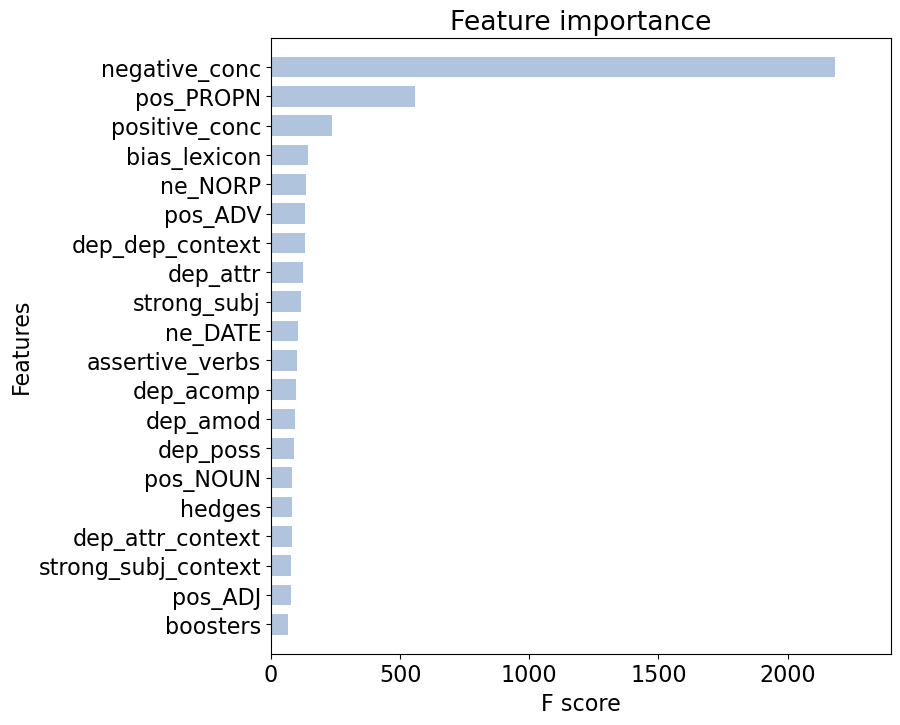

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_liwc, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.6 All features without lexical features

In [111]:
x_no_lex = x.drop(['negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',                   
 'hedges',
 'boosters',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context'], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\1735490617.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_no_lex = x.drop(['negative_conc',


In [112]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_lex, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [113]:
feature_names = list(x_no_lex.columns)
len(feature_names)

254

In [114]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [115]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [116]:
xgboost_no_lex = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[1]	dtrain-F1_score:0.00661	dval-F1_score:0.00000
[2]	dtrain-F1_score:0.29836	dval-F1_score:0.26891
[3]	dtrain-F1_score:0.32859	dval-F1_score:0.29907
[4]	dtrain-F1_score:0.35916	dval-F1_score:0.31771
[5]	dtrain-F1_score:0.35286	dval-F1_score:0.30956
[6]	dtrain-F1_score:0.36285	dval-F1_score:0.31510
[7]	dtrain-F1_score:0.36930	dval-F1_score:0.31842
[8]	dtrain-F1_score:0.37207	dval-F1_score:0.31800
[9]	dtrain-F1_score:0.37192	dval-F1_score:0.32454
[10]	dtrain-F1_score:0.37719	dval-F1_score:0.32510
[11]	dtrain-F1_score:0.37771	dval-F1_score:0.32467
[12]	dtrain-F1_score:0.38012	dval-F1_score:0.32546
[13]	dtrain-F1_score:0.38098	dval-F1_score:0.32503
[14]	dtrain-F1_score:0.38203	dval-F1_score:0.33118
[15]	dtrain-F1_score:0.38777	dval-F1_score:0.32852
[16]	dtrain-F1_score:0.38761	dval-F1_score:0.33596
[17]	dtrain-F1_score:0.38762	dval-F1_score:0.33596
[18]	dtrain-F1_score:0.38906	dval-F1_score:0.33640
[19]	dtrain-F1_score:0.39059	dval-F1_score:0.33729
[20]	dtrain-F1_score:0.39738	dval-F1_sco

In [117]:

# xgboost_no_lex.save_model("xgboost_no_lex.model")
xgboost_no_lex = xgboost.Booster()
xgboost_no_lex.load_model("data/xgboost_no_lex.model")

In [118]:
xgboost_no_lex_predt = np.where(xgboost_no_lex.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_lex, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_lex_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_lex_predt).transpose())

Performance of xgboost_no_lex, test:
F1: 0.4
Precision: 0.26
Recall: 0.85
AUC: 0.79
Accuracy: 0.75
Confusion matrix:
 [[2044   47]
 [ 740  258]]


Text(0, 0.5, 'Features')

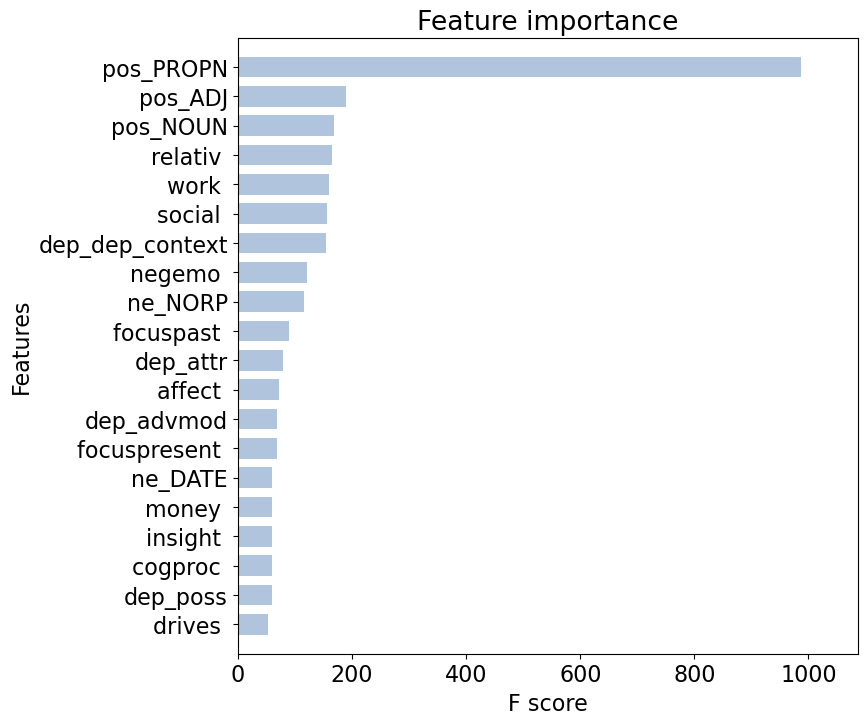

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_lex, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.7 All features without bias lexicon

In [120]:
x_no_bias_lex = x.drop(['bias_lexicon', 'bias_lexicon_context'], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\2136798192.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_no_bias_lex = x.drop(['bias_lexicon', 'bias_lexicon_context'], 1)


In [121]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_bias_lex, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [122]:
feature_names = list(x_no_bias_lex.columns)
len(feature_names)

280

In [123]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [124]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [125]:
xgboost_no_bias_lex = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[1]	dtrain-F1_score:0.40836	dval-F1_score:0.36634
[2]	dtrain-F1_score:0.43990	dval-F1_score:0.40149
[3]	dtrain-F1_score:0.44511	dval-F1_score:0.40816
[4]	dtrain-F1_score:0.44605	dval-F1_score:0.40794
[5]	dtrain-F1_score:0.44432	dval-F1_score:0.40714
[6]	dtrain-F1_score:0.44563	dval-F1_score:0.40636
[7]	dtrain-F1_score:0.44579	dval-F1_score:0.40422
[8]	dtrain-F1_score:0.44817	dval-F1_score:0.40760
[9]	dtrain-F1_score:0.45111	dval-F1_score:0.40893
[10]	dtrain-F1_score:0.45553	dval-F1_score:0.42123
[11]	dtrain-F1_score:0.45605	dval-F1_score:0.42123
[12]	dtrain-F1_score:0.45977	dval-F1_score:0.41413
[13]	dtrain-F1_score:0.46349	dval-F1_score:0.41521
[14]	dtrain-F1_score:0.46728	dval-F1_score:0.41575
[15]	dtrain-F1_score:0.46781	dval-F1_score:0.41563
[16]	dtrain-F1_score:0.47003	dval-F1_score:0.41186
[17]	dtrain-F1_score:0.47452	dval-F1_score:0.42205
[18]	dtrain-F1_score:0.47445	dval-F1_score:0.41875
[19]	dtrain-F1_score:0.47783	dval-F1_score:0.42368
[20]	dtrain-F1_score:0.48282	dval-F1_sco

In [126]:

# xgboost_no_bias_lex.save_model("xgboost_no_bias_lex.model")
xgboost_no_bias_lex = xgboost.Booster()
xgboost_no_bias_lex.load_model("data/xgboost_no_bias_lex.model")

In [127]:
xgboost_no_bias_lex_predt = np.where(xgboost_no_bias_lex.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_bias_lex, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_bias_lex_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_bias_lex_predt).transpose())

Performance of xgboost_no_bias_lex, test:
F1: 0.44
Precision: 0.3
Recall: 0.81
AUC: 0.8
Accuracy: 0.8
Confusion matrix:
 [[2216   58]
 [ 568  247]]


Text(0, 0.5, 'Features')

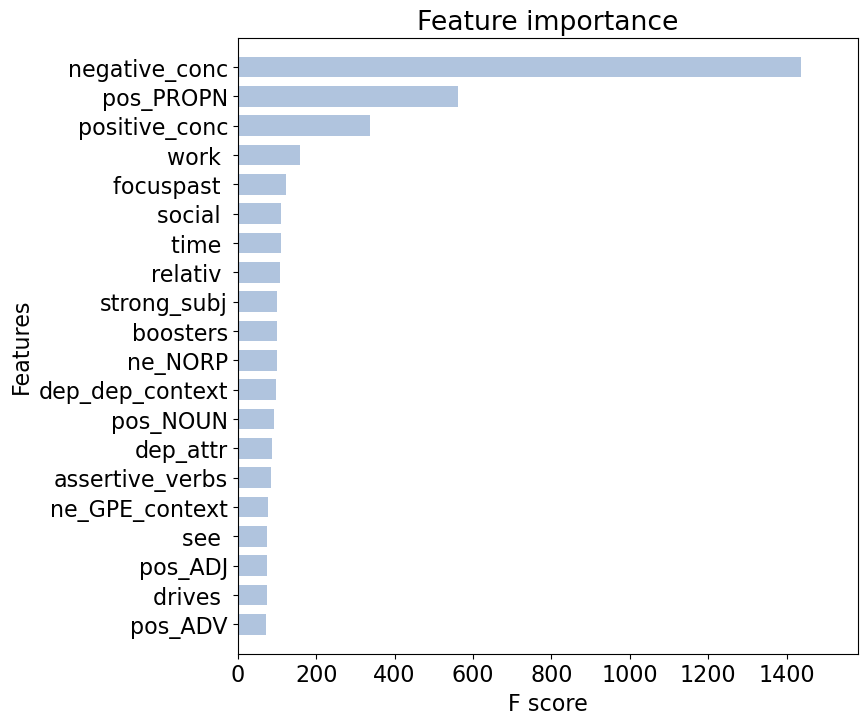

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_bias_lex, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.8 No context

In [129]:
x_no_context = x.drop(['negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',                       
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context'], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15712\3696920975.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_no_context = x.drop(['negative_conc_context',


In [130]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_context, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [131]:
feature_names = list(x_no_context.columns)
len(feature_names)

142

In [132]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [133]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [134]:
xgboost_no_context = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
[1]	dtrain-F1_score:0.32938	dval-F1_score:0.29851


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[2]	dtrain-F1_score:0.45281	dval-F1_score:0.41684
[3]	dtrain-F1_score:0.45117	dval-F1_score:0.42066
[4]	dtrain-F1_score:0.45277	dval-F1_score:0.42182
[5]	dtrain-F1_score:0.45728	dval-F1_score:0.40408
[6]	dtrain-F1_score:0.45821	dval-F1_score:0.40947
[7]	dtrain-F1_score:0.45909	dval-F1_score:0.41087
[8]	dtrain-F1_score:0.45856	dval-F1_score:0.41275
[9]	dtrain-F1_score:0.45879	dval-F1_score:0.40796
[10]	dtrain-F1_score:0.45872	dval-F1_score:0.41128
[11]	dtrain-F1_score:0.46039	dval-F1_score:0.40594
[12]	dtrain-F1_score:0.46006	dval-F1_score:0.41128
[13]	dtrain-F1_score:0.46366	dval-F1_score:0.40932


In [139]:

xgboost_no_context.save_model("xgboost_no_context.model")
xgboost_no_context = xgboost.Booster()
xgboost_no_context.load_model("xgboost_no_context.model")

In [140]:
xgboost_no_context_predt = np.where(xgboost_no_context.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_context, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_context_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_context_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_context_predt).transpose())

Performance of xgboost_no_context, test:
F1: 0.41
Precision: 0.28
Recall: 0.74
AUC: 0.77
Accuracy: 0.79
Confusion matrix:
 [[2211   80]
 [ 573  225]]


Text(0, 0.5, 'Features')

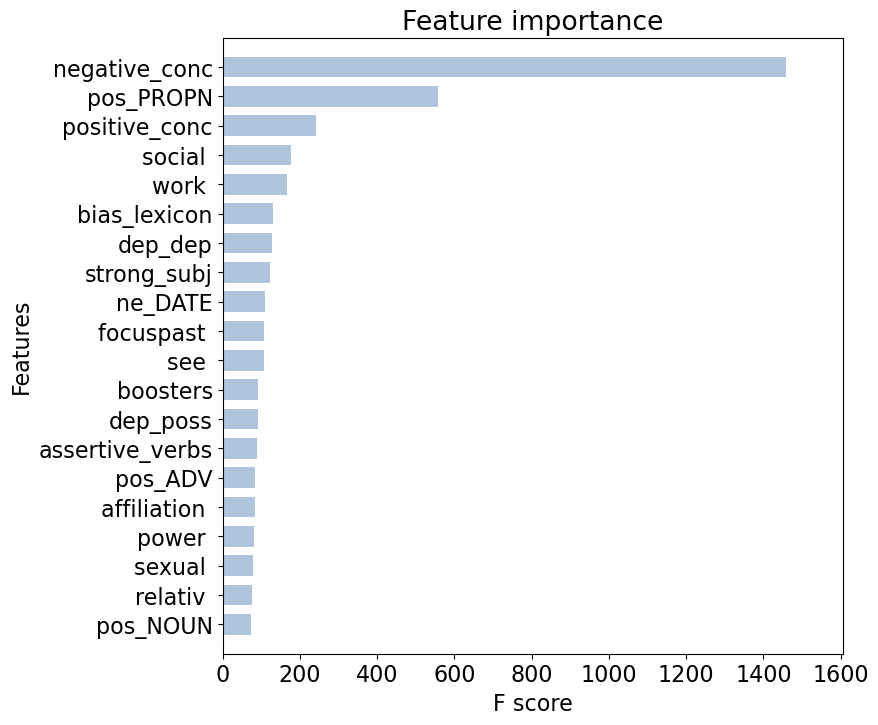

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_context, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)